In [16]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load IMDB dataset, keeping the top 10,000 most frequent words only
vocab_size = 10000  # limit vocabulary
maxlen = 200        # maximum review length

In [3]:
# Load training and testing data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [4]:
# Pad all sequences to ensure same input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
# sample info
print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("Example review (sequence of word indices):", x_train[0])
print("Label (1 = positive, 0 = negative):", y_train[0])

Training shape: (25000, 200)
Test shape: (25000, 200)
Example review (sequence of word indices): [   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104 

In [19]:
# Define the RNN model
model = models.Sequential([
    layers.Embedding(vocab_size, 64),  # embedding layer maps word indices to 64-dimensional vectors
    layers.SimpleRNN(64, dropout=0.3, recurrent_dropout=0.2),  # basic RNN with dropout
    layers.Dense(1, activation='sigmoid')  # binary output for sentiment (positive/negative)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Manually build the model to initialize weights and show summary properly
model.build(input_shape=(None, maxlen))  # None = any batch size

# Show model architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,321 (2.47 MB)

 Trainable params: 648,321 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
# Early stopping callback to prevent overfitting
early_stop = EarlyStopping(
    monitor='loss',
    patience=4,
    restore_best_weights=True
)

In [29]:
# Train the model on training data
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.8110 - loss: 0.4200 - val_accuracy: 0.7649 - val_loss: 0.5127
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.8060 - loss: 0.4321 - val_accuracy: 0.7594 - val_loss: 0.5231
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.8245 - loss: 0.3969 - val_accuracy: 0.7654 - val_loss: 0.5188
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.7899 - loss: 0.4450 - val_accuracy: 0.6590 - val_loss: 0.6242
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7610 - loss: 0.4771 - val_accuracy: 0.6852 - val_loss: 0.6760
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8058 - loss: 0.4235 - val_accuracy: 0.7215 - val_loss: 0.6122
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8042 - loss: 0.4213 - val_accuracy: 0.7114 - val_loss: 0.6139


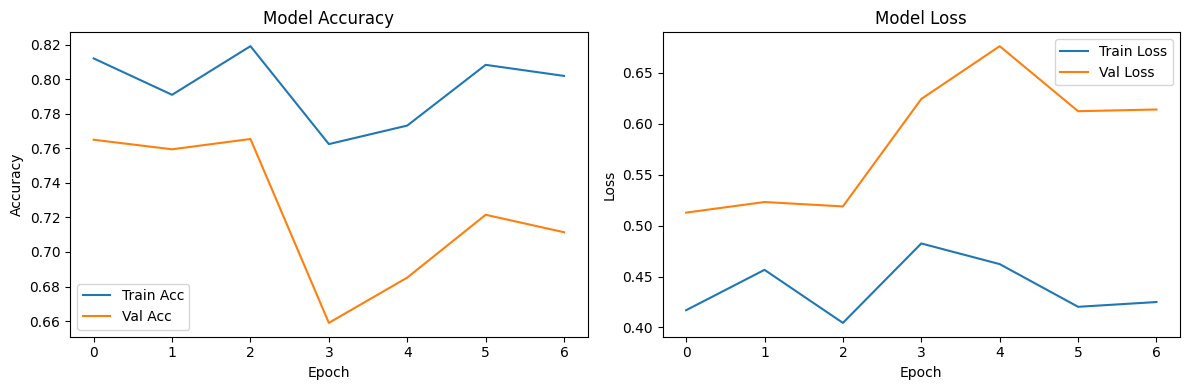

In [30]:
# Plot training vs validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7639 - loss: 0.5247
Test Accuracy: 0.7654


In [32]:
# Decode word index to reconstruct original text
word_index = imdb.get_word_index()
index_to_word = {i + 3: word for word, i in word_index.items()}
index_to_word[0], index_to_word[1], index_to_word[2] = "<PAD>", "<START>", "<UNK>"

In [13]:
# Convert sequence back to readable review
def decode_review(encoded_review):
    return ' '.join([index_to_word.get(i, '?') for i in encoded_review])

In [33]:
# Predict sentiment of the first 5 test samples
for i in range(5):
    sample = x_test[i].reshape(1, -1)
    prediction = model.predict(sample)[0][0]
    label = "Positive " if prediction >= 0.5 else "Negative "
    
    print(f"\nReview #{i + 1}:")
    print(decode_review(x_test[i]))
    print(f"Actual Label: {'Positive' if y_test[i] == 1 else 'Negative'}")
    print(f"Predicted Sentiment: {label} ({prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step

Review #1:
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know h